In [1]:
import numpy as np
from sklearn.datasets import load_svmlight_file
#this experiment uses a9a of LIBSVM Data, including 32561/16281(testing) samples and each sample has 123/123 (testing) features.
#The data is stored in a9a.txt and a9atest.txt
X_train,Y_train = load_svmlight_file('./datasets/a9a.txt',n_features=123)
X_train = X_train.toarray()
Y_train=Y_train.reshape((-1,1))
n_samples, n_features = X_train.shape
X_train = np.column_stack((X_train, np.ones((n_samples, 1))))
Y_train = Y_train.reshape((-1, 1))

X_test,Y_test = load_svmlight_file('./datasets/a9atest.txt',n_features=123)
X_test = X_test.toarray()
n_samples, n_features = X_test.shape
X_test = np.column_stack((X_test, np.ones((n_samples, 1))))
Y_test=Y_test.reshape((-1,1))

I:\softwares\Python\Python37\lib\site-packages\sklearn\feature_extraction\text.py:17: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping, defaultdict


In [17]:
max_epoch = 200  #最大迭代次数
learning_rate = 0.0001  #学习速率
C = 0.5
m,n = np.shape(X_train)
batch_size=int(m*0.1)  #批量随机的大小
losses_train = []
losses_val = []
w = np.random.random((n_features + 1, 1))  #初始化w

In [18]:
for epoch in range(max_epoch):
    #使用随机梯度下降
    randArr=np.random.randint(0,m,size=batch_size)
    X_train_batch=np.array([X_train[i] for i in randArr])
    Y_train_batch=[Y_train[i] for i in randArr]
    #计算w
    h = 1 - Y_train_batch * np.dot(X_train_batch, w)
    y_hat = np.where(h > 0, Y_train_batch, 0)
    w -= learning_rate * (w - C * np.dot(X_train_batch.transpose(), y_hat))
    #计算loss
    y_predict_train = np.where(np.dot(X_train, w) > 0, 1, -1)
    loss_train = np.sum(w * w) + C * \
                 np.sum(np.maximum(1 - Y_train * np.dot(X_train, w), 0))
    losses_train.append(loss_train / Y_train.size)

    y_predict_val = np.where(np.dot(X_test, w) > 0, 1, -1)
    loss_val = np.sum(w * w) + \
               C * np.sum(np.maximum(1 - Y_test * np.dot(X_test, w), 0))
    losses_val.append(loss_val/Y_test.size)

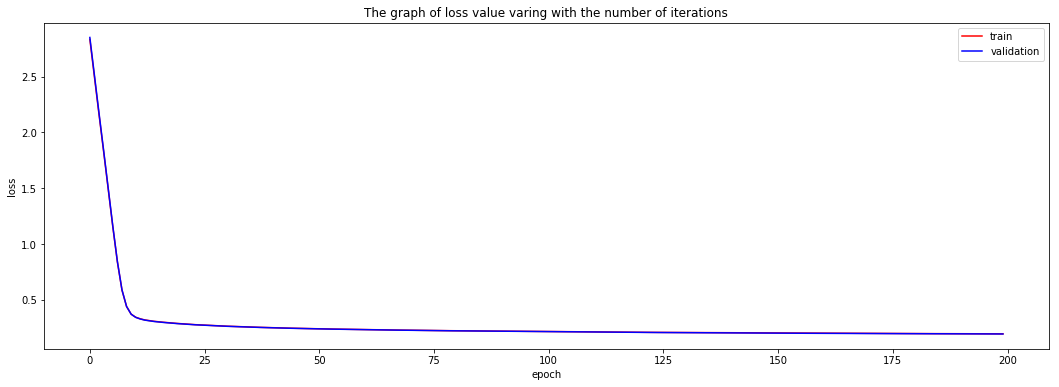

In [19]:
import matplotlib.pyplot as plt
#画出每一次迭代产生的w在测试集和验证集上的loss
plt.figure(figsize=(18, 6))
plt.plot(losses_train, color="r", label="train")
plt.plot(losses_val, color="b", label="validation")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("The graph of loss value varing with the number of iterations")
plt.savefig('./figures/SVM.png')
plt.show()